# CelebA: scan over the latent dimensionality n

## Setup

In [1]:
%matplotlib inline

import sys
import numpy as np
from matplotlib import pyplot as plt
from itertools import product

import plot_settings as ps


## Load results

In [2]:
dims = 2**np.arange(3, 10.5, 1, dtype=np.int)


def load(tag, shape, numpyfy=True, result_dir="../data/results"):
    results = []
    
    for dim in dims:
        try:
            this_result = np.load(f"{result_dir}/mf_{dim}_celeba_scan_{dim}_{tag}.npy")
            
            if (not numpyfy) or (shape is None) or np.product(this_result.shape) == np.product(shape):
                results.append(this_result.reshape(shape))
            else:
                results.append(np.nan*np.ones(shape))

        except FileNotFoundError as e:
            print(e)
            if shape is None:
                results.append(None)
            else:
                results.append(np.nan*np.ones(shape))
    
    if numpyfy:
        results = np.array(results, dtype=np.float)
        results = results.reshape([results.shape[0]] + list(shape))
        
    return results


model_test_reco_xs = load("model_x_reco_test", (100, 3, 64, 64))
model_test_reco_errors = load("model_reco_error_test", (100,))
model_gen_fids = load("samples_fid", (1,)).squeeze()
model_gen_fids.shape


(8,)

In [3]:
max_reco_error = 10000.
model_mean_reco_errors = np.mean(np.clip(model_test_reco_errors, 0., max_reco_error), axis=1)
model_mean_reco_errors.shape


(8,)

## Plot

In [4]:
ps.figure_width?

Signature:
ps.figure_width(
    width=4.5,
    large_margin=0.14,
    small_margin=0.03,
    make3d=False,
    l_space=True,
    r_space=False,
    b_space=True,
    t_space=False,
)
Docstring: <no docstring>
File:      ~/work/projects/manifold_flow/manifold-flow/experiments/notebooks/plot_settings.py
Type:      function


In [5]:
model_mean_reco_errors / 1.e3

array([3.98114368, 3.38912642, 2.66036253, 2.08965361, 1.59179219,
       1.17365542, 0.82722464, 0.53631511])

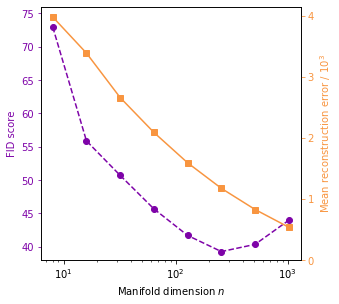

In [6]:
fig, ax1 = ps.figure_width(width=0.5*ps.TEXTWIDTH, r_space=True, small_margin=0.02, large_margin=0.12)

plt.plot(dims, model_gen_fids, marker="o", ms=6., c=ps.COLOR_FLMA, ls="--")

plt.xscale("log")
plt.xlabel("Manifold dimension $n$")

plt.ylabel("FID score")
plt.ylim(38,76)
ax1.yaxis.label.set_color(ps.COLOR_FLMA)
ax1.tick_params(axis='y', colors=ps.COLOR_FLMA)


ax2 = ax1.twinx()

plt.plot(dims, model_mean_reco_errors / 1.e3, marker="s", ms=6., c=ps.COLOR_AF, zorder=-5)

plt.ylabel("Mean reconstruction error / $10^3$")
plt.yticks([0., 1., 2., 3., 4])
plt.ylim(0., 4.15)
ax2.yaxis.label.set_color(ps.COLOR_AF)
ax2.tick_params(axis='y', colors=ps.COLOR_AF)

plt.savefig("../figures/celeba_dimension_scan.pdf")
